In [1]:
__version__ = 20201206
__author__ = "Guillermo Damke <gdamke@gmail.com>"

# Data visualization in Python and some useful Matplotlib uses and examples

### Data visualization

"Data visualization is an interdisciplinary field that deals with the *graphic representation of data*. It is a particularly *efficient way of communicating when the data is numerous...* 

"From an academic point of view, this representation can be considered as *a mapping between the original data (usually numerical) and graphic elements (for example, lines or points in a chart)*." 

"The mapping determines how the attributes of these elements vary according to the data. In this light, a bar chart is a mapping of the length of a bar to a magnitude of a variable."

"Since the graphic design of the mapping can adversely affect the readability of a chart, mapping is a core competency of Data visualization."

"Data visualization has its roots in the field of Statistics and is therefore generally considered a branch of Descriptive Statistics. However, because both design skills and statistical and computing skills are required to visualize effectively, it is argued by some authors that it is both an Art and a Science."

(quotes from Wikipedia)

### *Matplotlib: Visualization with Python*

"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python."

"Matplotlib makes easy things easy and hard things possible."

#### Pyplot

"`matplotlib.pyplot` is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc."

"pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation."

**IPython integration**

"We recommend using IPython for an interactive shell. In addition to all of its features (improved tab-completion, magics, multiline editing, etc), it also ensures that the GUI toolkit event loop is properly integrated with the command line" 

(quotes from matplotlib.org)

### *Seaborn: statistical data visualization*

Another visualization library that is becoming very polular is *Seaborn*. 

"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics." (from seaborn.pydata.org). 

As it can be seen, the library is based on Matplotlib, hence it's worth learning Matplotlib in first place.

### Importing matplotlib

Usually, one will use *pyplot*. Then, we will use the following import statement:

In [2]:
import matplotlib.pyplot as plt

# *Sometimes*, it is necessary to import matplotlib:
import matplotlib
matplotlib.__version__

'3.3.2'

In [3]:
import numpy as np # To create fake data.

Xdata = np.linspace(1,20,10)
Ymodel = 0.1*Xdata**2 - 10
Ydata1 =  Ymodel + np.random.randn(len(Xdata))*2
Ydata2 =  Ymodel + np.random.randn(len(Xdata))*20
Ydata3 =  Ymodel + np.random.randn(len(Xdata))*500

### The simplest plot:


In [4]:
# Change to `%matplotlib notebook` for interactive window
%matplotlib inline

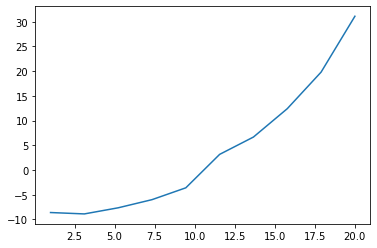

In [5]:
plt.plot( Xdata, Ydata1)
# Pan and zoom the figure! (if in `%matplotlib notebook` mode)

However, we usually need to do more complex plots and figures. We will explore some of the many options available in this library.

### Matplotlib figure and axes:

Each matplotlib plot is always created on *axes* (a type of object). Additionally, axes are drawn over a *figure*. A figure can contain one or many axes instances and can they can be organized in multiple ways.

Below, we will create a figure and an axes instance.

In [6]:
fig = plt.figure() # There are several arguments possible. Check the help.

# An empty figure!

<Figure size 432x288 with 0 Axes>

However, we usually need to create axes over this figure. The "fig" object has the `add_subplot` method to add one or more axes over a figure:

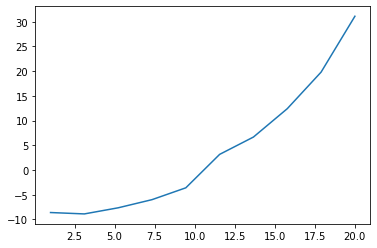

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot( Xdata, Ydata1)

It is possible to organize many axes (plots) on a single figure by specifying the number of subplots to create:

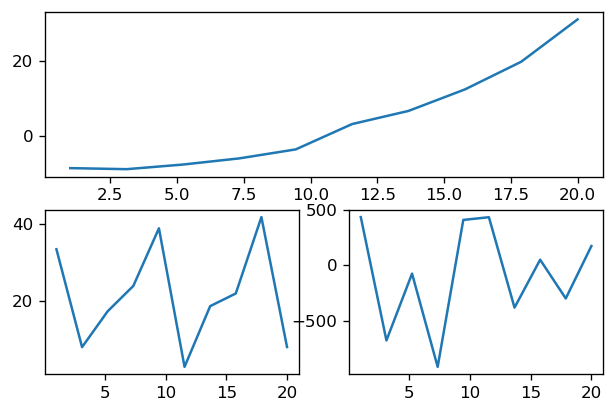

In [8]:
fig = plt.figure(figsize=(6,4), dpi=120) # figsize in inches, dpi is resolution as "dot per inches".

ax1 = fig.add_subplot( 211) # Two rows, one column, plot 1 (upper)
ax1.plot(Xdata, Ydata1)
ax2 = fig.add_subplot(223) # Two rows, two columns, plot 3 (lower left)
ax2.plot(Xdata, Ydata2)
ax3 = fig.add_subplot(224) # Two rows, two columns, plot 4 (lower right)
ax3.plot(Xdata, Ydata3)

In this case, we have generated the same plot but creating figure and axes instances.

### Making and organizing multiple plots in a figure with *subplots*

A simpler way to create multiple plots in a single call is using the `plt.subplots` method.

You can create one or more axes. The shape/type of the returned object as axes depends on how many axes you create. For example:

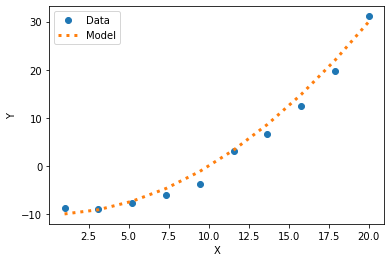

In [9]:
# One plot: The returned object is an `matplotlib.axes._subplots.AxesSubplot`
fig, ax = plt.subplots( nrows=1, ncols=1)
ax.plot(Xdata, Ydata1, 'o', label='Data')
ax.plot(Xdata, Ymodel, ':', label='Model', lw=3) # We pass a linewidht (lw) argument.
ax.legend( loc=0)
ax.set_xlabel("X")
ax.set_ylabel("Y") ; # The semicolon (;) prevents text on appearing above the plot.


In [10]:
# Check the type:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In the case of plotting more than one axes, then the returned object is a Numpy array with the respective shape matching (nrows, ncols). For example:

Notice that axs object type is: <class 'numpy.ndarray'> and its shape is :(2,)


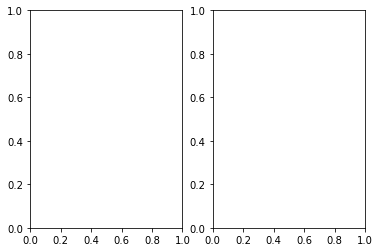

In [11]:
fig, axs = plt.subplots( nrows=1, ncols=2)
print( f"Notice that axs object type is: {type(axs)} and its shape is :{axs.shape}")


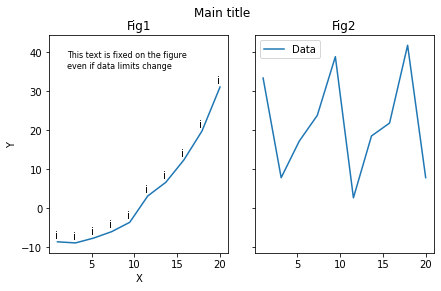

In [12]:
# Return a numpy array but we can assign the array elements on the same line,
# similarly to the use of "zip" in a previous module of this course.

fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, sharey=True) # Check the use of "sharey"
ax1.plot(Xdata, Ydata1, label='Data')
ax2.plot(Xdata, Ydata2, label='Data')
ax2.legend( loc=0)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

# Add text: Check the use of ha and va as the reference of the text coordinates.
for i,j in zip(Xdata, Ydata1):
    ax1.text( i, j+0.5, 'i',  ha='right', va='bottom') # Pass a horizontal alignment and vertical alignment
    
# Use "transform" in the text to give the coordinate references for the text.
# This is useful to "fix" the text in the figure even if the data coordinates change.
# check the table below for more details.
ax1.text( 0.1, 0.85, "This text is fixed on the figure\neven if data limits change", transform=ax1.transAxes, fontsize=8)

#
ax1.set_title("Fig1")
ax2.set_title("Fig2")
fig.suptitle("Main title")

# Adjust axes over the figure.
fig.subplots_adjust(wspace=0.15, left=0.1, right=0.99)

# Finally, we save as png. Matplotlib will accept and recognize multiple image formats.
# For example, you could use ".pdf" to create a PDF figure.
fig.savefig("output_figures/test01.png", dpi=300)

We will make the same plot as above, but with `sharey=False`.
First, notice how the limits of each plot are now adjusted independently.
Second, notice how the position of the text relative to the figure axes remains fixed when using `transform=ax1.transAxes`!

The `ax.transAxes` argument can take any of the following options:

|Coordinate | Transformation object | Description |
| :-------------: | :----------: | :----------- |
|Data |	ax.transData 	| The user land data coordinate system. Controlled by the xlim and ylim |
|Axes |	ax.transAxes 	| The coordinate system of the Axes. (0,0) is bottom left and (1,1) is top right of the axes. |
| Figure | 	fig.transFigure 	| The coordinate system of the Figure. (0,0) is bottom left and (1,1) is top right of the figure |
|display |	None 	| This is the pixel coordinate system of the display. (0,0) is the bottom left and (width, height) is the top right of display in pixels. Alternatively, the(matplotlib.transforms.IdentityTransform()) may be used instead of None.|

(table data from matplotlib.org)

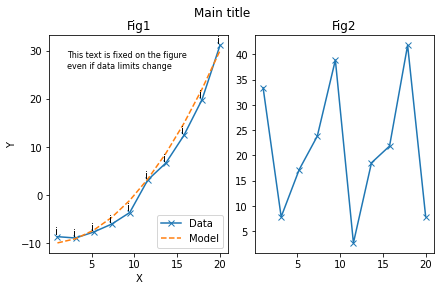

In [13]:
# Same as above, without 
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, sharey=False)
ax1.plot(Xdata, Ydata1, 'x-', label='Data')
ax1.plot(Xdata, Ymodel, '--', label='Model')
ax2.plot(Xdata, Ydata2, 'x-', label='Data')
ax1.legend( loc=4)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

# Add text:
for i,j in zip(Xdata, Ydata1):
    ax1.text( i, j, 'i',  ha='right', va='bottom') # Pass a horizontal alignment and vertical alignment argument
    
# Use of transAxes   
ax1.text( 0.1, 0.85, "This text is fixed on the figure\neven if data limits change", transform=ax1.transAxes, fontsize=8)
# Adjust figure
fig.subplots_adjust(wspace=0.15, left=0.1, right=0.99)

# Set a title for each axes plot and a main titple for the figure.
ax1.set_title("Fig1") 
ax2.set_title("Fig2")
fig.suptitle("Main title") 
fig.savefig("output_figures/test02.png", dpi=300)

Finally, we could reference the array object directly. For example:

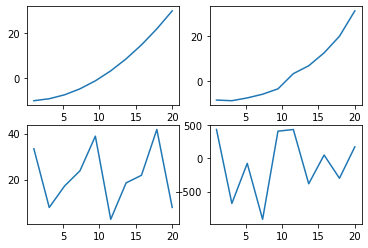

In [14]:
fig, axs = plt.subplots( nrows=2, ncols=2)
axs[0,0].plot(Xdata, Ymodel)
axs[0,1].plot(Xdata, Ydata1)
axs[1,0].plot(Xdata, Ydata2)
axs[1,1].plot(Xdata, Ydata3);

### Making and organizing multiple plots in a figure with *gridspec*

*Gridspec* offers a versatile way for creating and organizing multiple axes on a figure with custom distribution.

In [15]:
import matplotlib.gridspec as gridspec

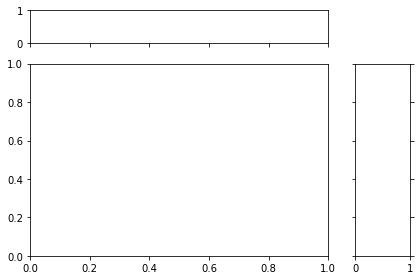

In [16]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(10, 10) # Define the number of "elements" along X and Y.

ax1 = fig.add_subplot(gs[2:, :8])
ax2 = fig.add_subplot(gs[:2, :8], sharex=ax1)
ax3 = fig.add_subplot(gs[2:, 8:], sharey=ax1)

ax3.tick_params( 'y', labelleft=False)
ax2.tick_params( 'x', labelbottom=False)
ax3.tick_params( 'y', right=True)

### Making a 2D histogram and a contour plot

Two common types of diagrams are the "2D histogram" and the"contour plot". They are built similarly, because the both need first the 2D counts in bins.

In [17]:
# Generate some data.
D = np.random.normal(100, size=(200,200))
X = np.r_[ D[:,0] + 5, D[:,0] - 1] # Create two data "blobs".
Y = np.r_[ D[:,1] + 20, D[:,1] + 21] 


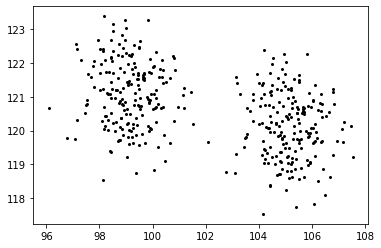

In [18]:
# This is how the data look like.
fig, ax = plt.subplots(1,1)
ax.plot( X, Y, 'ko', ms=2)


One way to create the "2D histogram" is using the function directly from matplotlib.

For example:

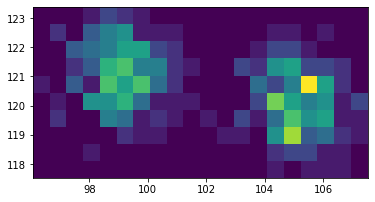

In [19]:
 # Use the "aspect" axis argument so that length along x is equal to length along y.
fig, ax = plt.subplots(1,1, subplot_kw={'aspect':'equal'})
H = plt.hist2d(X,Y, bins=(20,10))


More importantly, the output of hist2d (H) contains the histogram data and we use these data to create **contours** and **filled contours**. 

*Notice the use of the **transpose** method for the contours to work correctly*

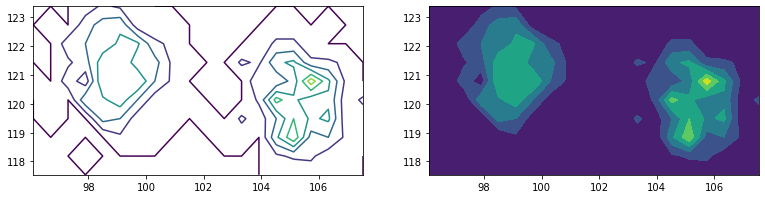

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(13,8))
ax1.contour( H[0].transpose(), extent=[H[1].min(), H[1].max(), H[2].min(), H[2].max()], levels=5)
ax2.contourf( H[0].transpose(), extent=[H[1].min(), H[1].max(), H[2].min(), H[2].max()], levels=5)

Additionally, the same counts in H can be obtained with the Numpy function `np.histogram2d`.

We can overlay both plots doing. Notice the use of *colormap* `cmap` option.

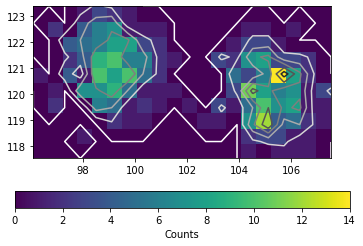

In [21]:
fig, ax = plt.subplots(1,1, subplot_kw={'aspect':'equal'})
H = plt.hist2d(X,Y, bins=(20,10))
ax.contour( H[0].transpose(), extent=[H[1].min(), H[1].max(), H[2].min(), H[2].max()], levels=5, cmap=plt.cm.gray_r)
cb = plt.colorbar(orientation='horizontal')
cb.set_label("Counts")

### Making multiple-page PDF outputs:

In [22]:
from matplotlib.backends.backend_pdf import PdfPages

Saving page: 1
Saving page: 2
Saving page: 3
Saving page: 4
Saving page: 5


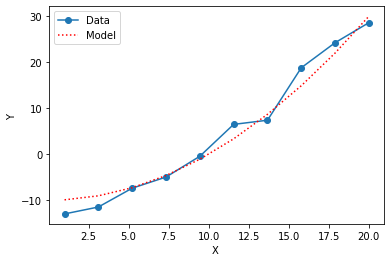

In [23]:
## Check the output at:
n_pages = 5
counter = 0
with PdfPages("output_figures/test_file.pdf") as pdf:
    while counter < n_pages:
        fig = plt.figure(1, figsize=(6, 4))
        fig.clf()
        ax = fig.add_subplot(1,1,1)
        ax.plot(Xdata, Ymodel + np.random.randn(len(Xdata))*4, 'o-', label='Data')
        ax.plot(Xdata, Ymodel, 'r:', label='Model')
        ax.legend(loc=0)
        ax.set_xlabel("X ")
        ax.set_ylabel("Y ")
        pdf.savefig(fig)
        print("Saving page:",counter+1)
        counter += 1

### Locators

*Locators* are another useful feature of matplotlib. They allow you to set ticks and tick labels on specific positions automatically and consistently. For example:

In [24]:
import matplotlib.ticker as ticker

In [25]:
np.random.seed(42)
Xdist = np.random.rand(20)

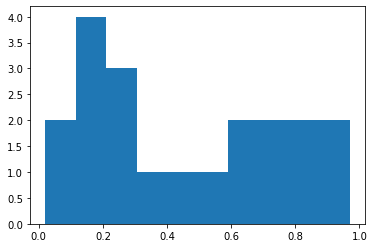

In [26]:
fig, ax = plt.subplots(1,1)
ax.hist( Xdist);


As you can see, it does not make sense to have a histogram with non-integer tick labels along the ordinate...
However, this is easy to fix with a *locator*:

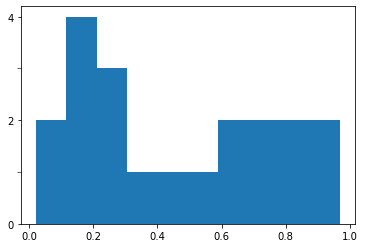

In [27]:
fig, ax = plt.subplots(1,1)
ax.hist( Xdist)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) # Major ticks every two units.
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1)) # Add minor ticks every one unit.
ax.tick_params(axis='y', which='minor', length=4)

There is a variety of locators available in matplotlib:

![Matplotlib locators](Figures/locators.png)

### Producing consistent plots and customization

Sometimes, for example when preparing an article or for your thesis, it is useful to have a set of parameters that produce consistent plots. Imagine that you define a figure that always result in a single-column plot of a given size, or another set of parameters for two-column plots.

Another case is that you may want to use different visual styles for plots on a single document.

You can achieve this all by using predefined parameters with **matplotlib context manager**.

First, all the parameters that control the behaviour of matplotlib is in `matplotib.rc_params()`, which have their default parameters in `matplotlib.rcParamsDefault`.

In [28]:
matplotlib.rc_params()

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [29]:
matplotlib.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

There are several styles available by default. You can list them by doing:

In [30]:
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fig_4x3_NaI',
 'fig_5x3.75_NaI',
 'fig_5x5',
 'fig_6x6',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

For example, let's use the `ggplot` style:

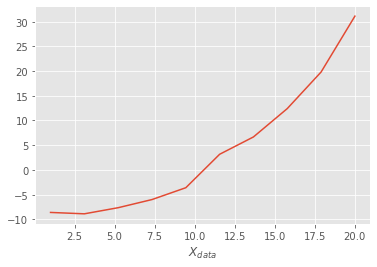

In [31]:
# The defaults of ggplot will only be used within the `with` statement!!!
with matplotlib.style.context("ggplot"):
    fig, ax = plt.subplots(1,1)
    ax.plot(Xdata, Ydata1)
    ax.set_xlabel( r"$X_{data}$")

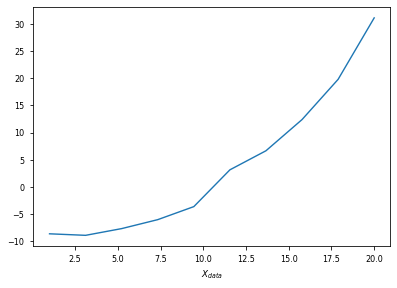

In [32]:
# Same code, bu using the seaborn-paper defaults!!!
with matplotlib.style.context("seaborn-paper"):
    fig, ax = plt.subplots(1,1)
    ax.plot(Xdata, Ydata1)
    ax.set_xlabel( r"$X_{data}$")

To modify the default parameters on your own, you just have to add a file per style with the name of the style as the filename and a *.mplstyle* extension within the folder:

`~/.config/matplotlib/stylelib`

Within each file, define one parameter per line following a dictionary-like syntax. For example, within a file called `fig_5x5.mplstyle`, I have the following parameters defined:

`axes.unicode_minus  : False
figure.figsize      : 5.0, 5.0
figure.dpi          : 200
font.family         : serif
font.size           : 8
axes.linewidth      : 0.8
lines.linewidth     : 0.8
grid.linewidth      : 0.8
xtick.major.width   : 0.8
ytick.major.width   : 0.8
xtick.minor.width   : 0.8
ytick.minor.width   : 0.8`

which produce the following results:

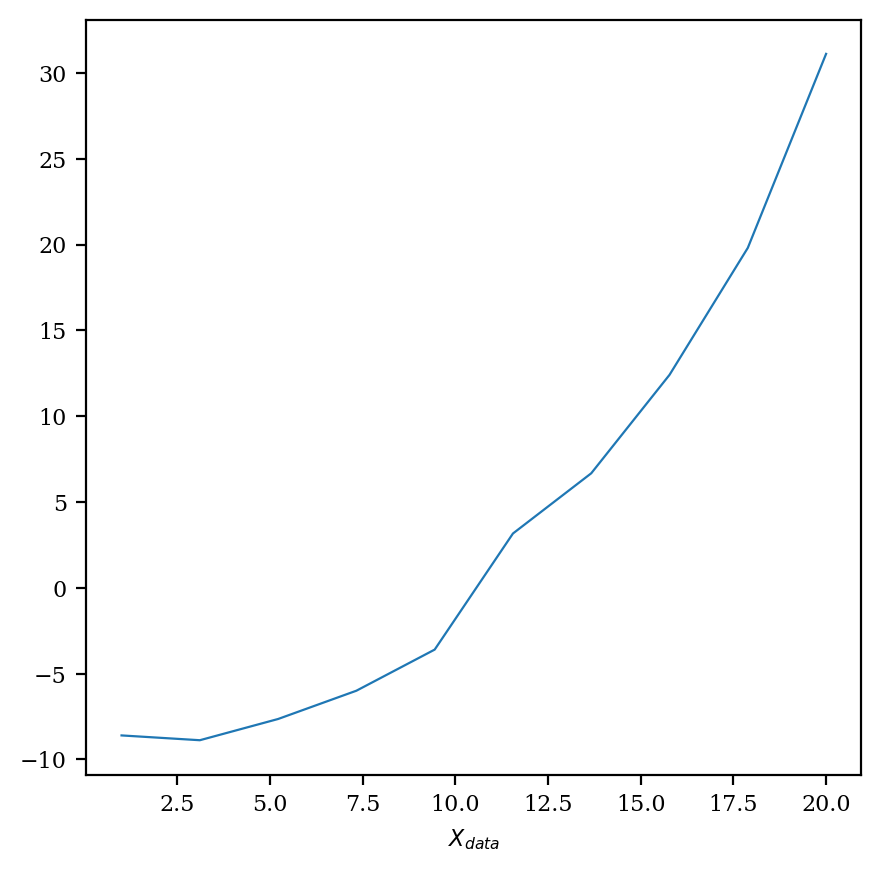

In [33]:
with matplotlib.style.context("fig_5x5"):
    fig, ax = plt.subplots(1,1)
    ax.plot(Xdata, Ydata1)
    ax.set_xlabel( r"$X_{data}$")

# Finally, an important advise:

### Q: How can I make some special type of plot if I do not know the name/type of plot?

**A: Look for what you need on the matplotlib gallery in matplotlib.org!**